# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.




In [837]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [838]:
dataset = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y] # one hot

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))


###  one hot

---
In short, with the following codes, we want to determine the number of outputs that we are considering here, which one is the new number from 0 to 9, that is, we have 10 outputs, the first of which shows the percentage of probability that it is zero, and the second of which is the percentage. The probability is one to the tenth, which means how many percent is the probability that the new number is not a number, but these are all probabilities. You cannot compare with the real number to see if it is correctly recognized or not, that's why the real number used for train is a number. For example, 5, for this we need to make that value one hot so that it becomes the same size as our output so that we can calculate the accuracy and other parameters.



In [852]:
np.eye(9) #  هر عددی که هست رو یک میکند بقیه صفر


array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [840]:
dataset.data.shape

(1797, 64)

In [841]:
dataset.images.shape

(1797, 8, 8)

In [842]:
dataset.target.shape

(1797,)

In [843]:
print(dataset.data[80])
print(dataset.images[80])
print(dataset.target[80])

[ 0.  0.  0.  1. 14. 13.  1.  0.  0.  0.  0.  1. 16. 16.  3.  0.  0.  5.
 11. 15. 16. 16.  0.  0.  0.  4. 15. 16. 16. 15.  0.  0.  0.  0.  0.  8.
 16.  7.  0.  0.  0.  0.  0. 10. 16.  3.  0.  0.  0.  0.  0.  8. 16.  6.
  0.  0.  0.  0.  0.  2. 13. 15.  2.  0.]
[[ 0.  0.  0.  1. 14. 13.  1.  0.]
 [ 0.  0.  0.  1. 16. 16.  3.  0.]
 [ 0.  5. 11. 15. 16. 16.  0.  0.]
 [ 0.  4. 15. 16. 16. 15.  0.  0.]
 [ 0.  0.  0.  8. 16.  7.  0.  0.]
 [ 0.  0.  0. 10. 16.  3.  0.  0.]
 [ 0.  0.  0.  8. 16.  6.  0.  0.]
 [ 0.  0.  0.  2. 13. 15.  2.  0.]]
1


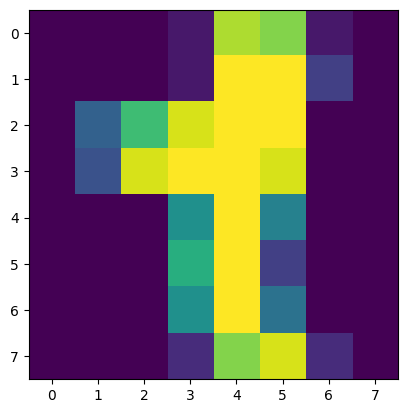

In [844]:
plt.imshow(dataset.images[80])

In [845]:
# Activation function
def sigmoid(X):
  return 1 / ( 1  + np.exp(-X))

def softmax(X) :
  return np.exp(X) / np.sum(np.exp(X))

def root_mean_squired_error(Y_gt , Y_pred):
  return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [846]:
epochs = 80
lr = 0.001

Dimension_Input = X_train.shape[1] # Dimension_Input = 64
HiddenLayer1 = 128
HiddenLayer2 = 32
Dimension_Output = Y_train.shape[1] # Dimension_Output = len(np.unique(Y_train))

In [847]:
W1 = np.random.randn(Dimension_Input , HiddenLayer1)
W2 = np.random.randn(HiddenLayer1 , HiddenLayer2)
W3 = np.random.randn(HiddenLayer2 , Dimension_Output)

In [848]:
#  به ازای هر نرون در شبکه عصبی یک بایاس داریم
bias1 = np.random.randn(HiddenLayer1)
bias2 = np.random.randn(HiddenLayer2)
bias3 = np.random.randn(Dimension_Output)


In [849]:
for epoch in range(epochs):

    # train

    Y_pred_train = []
    for x, y in zip(X_train, Y_train):

        # forward
        x = x.reshape(-1, 1)

        # layer 1
        net1 = x.T @ W1 + bias1
        out1 = sigmoid(net1)

        # layer 2
        net2 = out1 @ W2 + bias2
        out2 = sigmoid(net2)

        # layer 3
        net3 = out2 @ W3 + bias3
        out3 = softmax(net3)

        y_pred = out3
        Y_pred_train.append(y_pred.T)

        # back propagation

        # layer 3
        error = -2 * (y - y_pred)
        Gradient_W3 = out2.T @ error
        Gradient_bias3 = error

        # layer 2
        error = error @ W3.T * out2 * (1 - out2)
        Gradient_W2 = out1.T @ error
        Gradient_bias2 = error

        # layer 1
        error = error @ W2.T * out1 * (1 - out1)
        Gradient_W1 = x @ error
        Gradient_bias1 = error

        # update

        # layer 1
        W1 = W1 - lr * Gradient_W1
        bias1 = bias1 - lr * Gradient_bias1

        # layer 2
        W2 = W2 - lr * Gradient_W2
        bias2 = bias2 - lr * Gradient_bias2

        # layer 3
        W3 = W3 - lr * Gradient_W3
        bias3 = bias3 - lr * Gradient_bias3

    Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)
    loss_train = root_mean_squired_error(Y_pred_train, Y_train)
    acc_train = np.mean(np.argmax(Y_pred_train, axis=1) == np.argmax(Y_train, axis=1))

    # test

    Y_pred_test = []
    for x, y in zip(X_test, Y_test):

        # forward
        x = x.reshape(-1, 1)

        # layer 1
        net1 = x.T @ W1 + bias1
        out1 = sigmoid(net1)

        # layer 2
        net2 = out1 @ W2 + bias2
        out2 = sigmoid(net2)

        # layer 3
        net3 = out2 @ W3 + bias3
        out3 = softmax(net3)

        y_pred = out3
        Y_pred_test.append(y_pred.T)

    Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)
    loss_test = root_mean_squired_error(Y_pred_test, Y_test)
    acc_test = np.mean(np.argmax(Y_pred_test, axis=1) == np.argmax(Y_test, axis=1))

    print('loss train:', loss_train,"----------------------" ,'acc train:', acc_train)
    print('loss test:', loss_test,"------------------------" ,'acc test:', acc_test)

print('completed!')

loss train: 0.30480130925639315 ---------------------- acc train: 0.24008350730688935
loss test: 0.28679624081711874 ------------------------ acc test: 0.3194444444444444
loss train: 0.26837195372677447 ---------------------- acc train: 0.441892832289492
loss test: 0.26901286070538655 ------------------------ acc test: 0.41944444444444445
loss train: 0.2460155561743052 ---------------------- acc train: 0.5629784272790536
loss test: 0.25410682039673194 ------------------------ acc test: 0.49444444444444446
loss train: 0.22917933227186932 ---------------------- acc train: 0.6360473208072372
loss test: 0.24265372403443422 ------------------------ acc test: 0.5833333333333334
loss train: 0.2163857059369593 ---------------------- acc train: 0.6896311760612387
loss test: 0.23225069966701906 ------------------------ acc test: 0.6083333333333333
loss train: 0.20514608379230784 ---------------------- acc train: 0.7313848295059151
loss test: 0.22411791331346542 ------------------------ acc test:

In [850]:
import cv2

image = cv2.imread("/content/input/0.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.reshape(64,1)
x = image

# forward

# layer 1
net1 = x.T @ W1 + bias1
out1 = sigmoid(net1)

# layer 2
net2 = out1 @ W2 + bias2
out2 = sigmoid(net2)

# layer 3
net3 = out2 @ W3 + bias3
out3 = softmax(net3)

y_pred = out3
print(np.argmax(y_pred))


0


In [851]:
for i in range(10):
    image = cv2.imread(f"input/{i}.jpg")
    image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

    if i==0:
        image1=image

    image = image.reshape(1,64)

    x= image
    # forward

    # layer 1

    out1 = sigmoid(x @ W1 + bias1)

    # layer 2
    net2 = out1 @ W2 + bias2
    out2 = sigmoid(net2)

    # layer 3
    net3 = out2 @ W3 + bias3
    out3 = softmax(net3)

    y_pred = out3
    y_predict = np.argmax(y_pred)
    # print(f"result: {y_pred}")
    print(f"True number is: {i}  , predict number is:{y_predict}")

True number is: 0  , predict number is:0
True number is: 1  , predict number is:1
True number is: 2  , predict number is:2
True number is: 3  , predict number is:3
True number is: 4  , predict number is:7
True number is: 5  , predict number is:5
True number is: 6  , predict number is:8
True number is: 7  , predict number is:7
True number is: 8  , predict number is:5
True number is: 9  , predict number is:9
